In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from patsy.builtins import *

# 1   Importation, ajustement et jonction des bases de données

In [25]:
# Arrivées entre 2016 et 2018
df_nb_arrive_16_18= pd.read_csv("./Nb_arrive_16-18.csv",sep=",")
df_nb_arrive_16_18=df_nb_arrive_16_18.rename(columns={"P18_PMEN_ANEM0002" :"Arrivées"})
# Salaire moyen
df_salaire=pd.read_excel("./Salaire.xlsx",sheet_name="DEP",engine="openpyxl")
df_salaire=df_salaire[["Num","Ensemble"]]
df_salaire=df_salaire.drop(df.index[96:])
df_salaire=df_salaire.rename(columns={"Ensemble" :"Salaire"})
# Chômage fin 2015
df_chomage_dep=pd.read_csv("./chomage_dep.csv",sep=";")
df_chomage_dep=df_chomage_dep[["Code","T4_2015"]]
df_chomage_dep=df_chomage_dep.drop([96,97,98,99])
df_chomage_dep=df_chomage_dep.rename(columns={"T4_2015" :"Chômage"})
df_chomage_dep["Chômage"]=df_chomage_dep["Chômage"].apply(lambda x : float(x.replace(',','.')))
# Équipements en 2015
df_equip_dep_2015=pd.read_csv("./base_equip_dep_2015.csv", sep=",")
df_equip_dep_2015=df_equip_dep_2015.drop([96,97,98,99])
# Départements frontaliers
df_dpt_frontieres=pd.read_csv("./base_dpt_frontieres.csv", sep=",")
# Départements sur le littoral
df_dpt_littoraux=pd.read_csv("./base_dpt_littoraux.csv", sep=",")


In [26]:
#Jonction des bases de données
df=pd.concat([df_nb_arrive_16_18,df_salaire,df_chomage_dep,df_equip_dep_2015,df_dpt_frontieres,df_dpt_littoraux],axis=1)

# 2 Effets du marché du travail sur l'attractivité du territoire

## 2.1 Taux de chômage

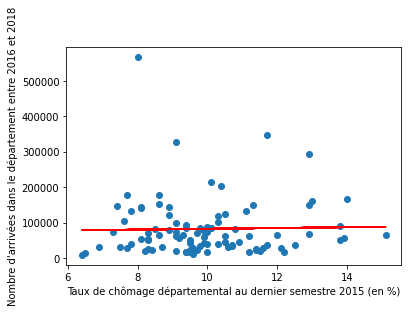

In [40]:
X=df["Chômage"].values.reshape(-1, 1)
Y=df["Arrivées"].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel("Taux de chômage départemental au dernier semestre 2015 (en %)")
plt.ylabel("Nombre d'arrivées dans le département entre 2016 et 2018")
plt.show()

Le taux de chômage départemental fin 2015 ne semble pas avoir un effet significatif sur les arrivées dans le département pendant les deux années qui suivent, ce que confirme la régression ci-dessous.

In [36]:
fit=smf.ols(formula="Arrivées ~ Chômage", data=df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:               Arrivées   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.05542
Date:                Thu, 06 Jan 2022   Prob (F-statistic):              0.814
Time:                        17:45:41   Log-Likelihood:                -1222.4
No. Observations:                  96   AIC:                             2449.
Df Residuals:                      94   BIC:                             2454.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.116e+04   4.83e+04      1.474      0.1

## 2.2 Salaire moyen

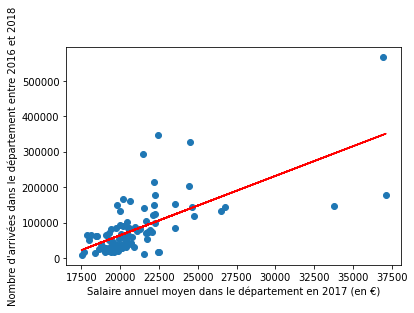

In [41]:
X=df["Salaire"].values.reshape(-1, 1)
Y=df["Arrivées"].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel("Salaire annuel moyen dans le département en 2017 (en €)")
plt.ylabel("Nombre d'arrivées dans le département entre 2016 et 2018")
plt.show()

Le salaire moyen a lui un impact bien plus significatif, les territoires où il est plus élevé étant logiquement plus attractifs.

In [38]:
fit=smf.ols(formula="Arrivées ~ Salaire", data=df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:               Arrivées   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     70.68
Date:                Thu, 06 Jan 2022   Prob (F-statistic):           4.43e-13
Time:                        17:49:22   Log-Likelihood:                -1195.5
No. Observations:                  96   AIC:                             2395.
Df Residuals:                      94   BIC:                             2400.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.716e+05   4.26e+04     -6.378      0.0

# 3 Effets des infrastructures sur l'attractivité du territoire

In [42]:
fit=smf.ols(formula="Arrivées ~ Automobile + Banque + Construction + Q('Grande surface') + Q('Infrastructure sportive') + Justice + Q('Magasin de consommation') + Q('Petite surface')  + Sante + Tourisme + Transport", data=df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:               Arrivées   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     256.5
Date:                Thu, 06 Jan 2022   Prob (F-statistic):           1.05e-59
Time:                        18:00:43   Log-Likelihood:                -1052.4
No. Observations:                  96   AIC:                             2129.
Df Residuals:                      84   BIC:                             2159.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

Tous les types d'infrastructures n'ont pas un effet significatif sur les arrivées dans le département. On peut s'étonner de voir que ce sont les infrastructures bancaires qui augmentent le plus l'attractivité du territoire, ou que les magasins de consommation aient un effet significatif mais pas les grandes ou petites surfaces. On comprend mieux que la présence d'équipements en santé et en transport incite les gens à s'installer dans le département. Enfin, l'effet négatif des infrastructures touristiques peut s'expliquer par le fait qu'un département très touristique peut avoir tendance à moins attirer de résidents permanents.

# 4 Effets de la situation géographique du département (littoraux et frontières)

In [51]:
(df[df["Littoral"]==1]["Arrivées"].mean())/df[df["Littoral"]==0]["Arrivées"].mean()

1.6193542356689752

On constate qu'en moyenne, un département situé sur le littoral a eu 62% d'arrivées supplémentaires entre 2016 et 2018 qu'un département intérieur.

In [52]:
(df[df["Frontiere"]==1]["Arrivées"].mean())/df[df["Frontiere"]==0]["Arrivées"].mean()

0.9088878835026017

À l'inverse, les départements frontaliers ont reçu 9% d'arrivées en moins que les autres départements en moyenne. On a alors vérifié ces effets géographiques par une régression.

In [55]:
fit=smf.ols(formula="Arrivées ~ Littoral + Frontiere", data=df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:               Arrivées   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     2.768
Date:                Thu, 06 Jan 2022   Prob (F-statistic):             0.0680
Time:                        18:31:57   Log-Likelihood:                -1219.7
No. Observations:                  96   AIC:                             2445.
Df Residuals:                      93   BIC:                             2453.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    7.12e+04   1.09e+04      6.513      0.0

La régression confirme la première constatation : les littoraux ont un effet attractif significatif. Cependant, elle révèle également que la différence entre départements frontaliers et non frontaliers n'est pas interprétable.